<a href="https://colab.research.google.com/github/cheriehong/cherie-310D_coding_assignment_1/blob/main/Coding_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libraries

In [128]:
# Check if beautifulsoup and pandas are already installed
# If not, install it and then import

try:
    from bs4 import BeautifulSoup
    import pandas
    print ("BeautifulSoup and Pandas are already installed and imported")
except:
    import sys
    !pip install --yes --prefix {sys.prefix} bs4
    !pip install --yes --prefix {sys.prefix} pandas
    from bs4 import BeautifulSoup
    import pandas
    print ("BeautifulSoup and Pandas were not found. Installed them and imported")

import requests


BeautifulSoup and Pandas are already installed and imported


## Read the webpage and parse it with BeautifulSoup


In [129]:
opened_webpage = requests.get("https://en.wikipedia.org/wiki/List_of_the_largest_population_centres_in_Canada")
print ("Webpage opened successfully...")

# Initialize a BeautifulSoup object to read and parse the webpage read
# This is like calling the __init__ function in BeautifulSoup
bs = BeautifulSoup(opened_webpage.content, "html.parser")
print ("Webpage loaded and parsed successfully...")

Webpage opened successfully...
Webpage loaded and parsed successfully...


## 1. Data Extraction

In [130]:
# Define an empty list where the data will be kept
raw_data = []

# Find all the tables in the webpage page that we have just parsed
table = bs.find_all("table", {'class':"wikitable"})

for row in table:
    line = row.text
    raw_data.append(line)

print(raw_data)

["\n\nRank\n\nPopulation centre[5]\n\nProvince[5]\n\nSize group[5]\n\nPopulation (2021)[5]\n\nPopulation (2016)[5]\n\nChange[5]\n\nLand area (km2)[5]\n\nPopulation density (/km2)[5]\n\n\n1\nToronto\nOntario\nLarge urban\n5,647,656\n\n5,433,590\n\n+3.9%\n1,829.05\n3,087.8\n\n\n2\nMontreal\nQuebec\nLarge urban\n3,675,219\n\n3,528,651\n\n+4.2%\n1,382.47\n2,658.4\n\n\n3\nVancouver\nBritish Columbia\nLarge urban\n2,426,160\n\n2,268,864\n\n+6.9%\n911.64\n2,661.3\n\n\n4\nCalgary\nAlberta\nLarge urban\n1,305,550\n\n1,240,413\n\n+5.3%\n621.72\n2,099.9\n\n\n5\nEdmonton\nAlberta\nLarge urban\n1,151,635\n\n1,070,998\n\n+7.5%\n627.2\n1,836.2\n\n\n6\nOttawa–Gatineau\nOntario / Quebec\nLarge urban\n1,068,821\n\n994,576\n\n+7.5%\n549.49\n1,945.1\n\n\n7\nWinnipeg\nManitoba\nLarge urban\n758,515\n\n712,858\n\n+6.4%\n356.99\n2,124.8\n\n\n8\nQuebec City\nQuebec\nLarge urban\n733,156\n\n708,280\n\n+3.5%\n442.85\n1,655.5\n\n\n9\nHamilton\nOntario\nLarge urban\n729,560\n\n693,362\n\n+5.2%\n356.03\n2,049.2\n\

## 2.1 Transform


*  Define a list of columns and store the column names in the list List item
*  Extract one row from raw data at a time, make a dictionary (key-value pair) out of it, where the keys are the column names and values are the entries




In [131]:
column_names = ["Rank", "Population centre[5]", "Province[5]", "Size group[5]", "Population (2021)[5]",
                "Population (2016)[5]", "Change[5]", "Land area (km2)[5]", "Population density (/km2)[5]"]

final_data = []
for data in raw_data:
    entries = data.split("\n") # this will return a list of strings
    for i in column_names:
      entries.remove(i)

row = []  # empty list for every row
count = 0 # set loop variable to zero
for entry in entries:
    if entry != '': # this will skip empty spaces
      count += 1
      if count < 9:
        row.append(entry) # add data point to list row
      else:
        row.append(entry) # add entry to list row
        final_data.append(row) # add list row to list final_data
        count = 0 # reset count variable to zero
        row = [] # reset empty row list to start new list row
    else:
      continue # if data point is empty space continue on to next data point

# Sanity check - let's print the first 5 rows
print(final_data[:5])



[['1', 'Toronto', 'Ontario', 'Large urban', '5,647,656', '5,433,590', '+3.9%', '1,829.05', '3,087.8'], ['2', 'Montreal', 'Quebec', 'Large urban', '3,675,219', '3,528,651', '+4.2%', '1,382.47', '2,658.4'], ['3', 'Vancouver', 'British Columbia', 'Large urban', '2,426,160', '2,268,864', '+6.9%', '911.64', '2,661.3'], ['4', 'Calgary', 'Alberta', 'Large urban', '1,305,550', '1,240,413', '+5.3%', '621.72', '2,099.9'], ['5', 'Edmonton', 'Alberta', 'Large urban', '1,151,635', '1,070,998', '+7.5%', '627.2', '1,836.2']]


Convert to DataFrame



*   A DataFrame is a data structure that organizes data into a 2-dimensional table of rows and columns, much like a spreadsheet. DataFrames are one of the most common data structures used in modern data analytics because they are a flexible and intuitive way of storing and working with data.
*   We use **Pandas** to convert our data into dataframe




In [132]:
final_data = pandas.DataFrame(final_data, columns = column_names)

# Print a few elements in the dataframe
final_data.head()

,Rank,Population centre[5],Province[5],Size group[5],Population (2021)[5],Population (2016)[5],Change[5],Land area (km2)[5],Population density (/km2)[5]
0,1,Toronto,Ontario,Large urban,"5,647,656","5,433,590",+3.9%,"1,829.05","3,087.8"
1,2,Montreal,Quebec,Large urban,"3,675,219","3,528,651",+4.2%,"1,382.47","2,658.4"
2,3,Vancouver,British Columbia,Large urban,"2,426,160","2,268,864",+6.9%,911.64,"2,661.3"
3,4,Calgary,Alberta,Large urban,"1,305,550","1,240,413",+5.3%,621.72,"2,099.9"
4,5,Edmonton,Alberta,Large urban,"1,151,635","1,070,998",+7.5%,627.2,"1,836.2"


At this point we have transformed our data into a decent form. We can choose to store it or do a bit more cleaning and then store.

Some basic cleaning that we can do:

- Does the data contain any duplicate rows? If yes, remove them.
- Does the data contain any NULL entries? If yes, then replace the entry with a default value (we can even remove the row completely).

And some basic statistical analysis before storing the data

Duplication Checks and Cleaning

In [133]:
number_of_duplicates = final_data.duplicated().sum()
print (f" Number of duplicates before : {number_of_duplicates}")

# Delete duplicate rows
final_data = final_data.drop_duplicates()

number_of_duplicates = final_data.duplicated().sum()
print (f" Number of duplicates after removing : {number_of_duplicates}")

# Rename columns
final_data = final_data.rename(columns={"Population centre[5]": "Population center", "Province[5]": "Province",
                                        "Size group[5]": "Size group", "Population (2021)[5]": "Population (2021)",
                "Population (2016)[5]": "Population (2016)", "Change[5]": "Change", "Land area (km2)[5]": "Land area (km^2)",
                                        "Population density (/km2)[5]": "Population density (/km^2)"})



 Number of duplicates before : 0
 Number of duplicates after removing : 0


Inspecting data and checking noisy entries

In [134]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Rank                        100 non-null    object
 1   Population center           100 non-null    object
 2   Province                    100 non-null    object
 3   Size group                  100 non-null    object
 4   Population (2021)           100 non-null    object
 5   Population (2016)           100 non-null    object
 6   Change                      100 non-null    object
 7   Land area (km^2)            100 non-null    object
 8   Population density (/km^2)  100 non-null    object
dtypes: object(9)
memory usage: 7.8+ KB


Delete the row with NULL entries

In [135]:
final_data = final_data.dropna()
final_data

,Rank,Population center,Province,Size group,Population (2021),Population (2016),Change,Land area (km^2),Population density (/km^2)
0,1,Toronto,Ontario,Large urban,"5,647,656","5,433,590",+3.9%,"1,829.05","3,087.8"
1,2,Montreal,Quebec,Large urban,"3,675,219","3,528,651",+4.2%,"1,382.47","2,658.4"
2,3,Vancouver,British Columbia,Large urban,"2,426,160","2,268,864",+6.9%,911.64,"2,661.3"
3,4,Calgary,Alberta,Large urban,"1,305,550","1,240,413",+5.3%,621.72,"2,099.9"
4,5,Edmonton,Alberta,Large urban,"1,151,635","1,070,998",+7.5%,627.2,"1,836.2"
...,...,...,...,...,...,...,...,...,...
95,96,Parksville,British Columbia,Small,"27,330","25,364",+7.8%,27.45,995.6
96,97,Keswick – Elmhurst Beach,Ontario,Small,"27,145","26,999",+0.5%,16.56,"1,639.2"
97,98,Fort Saskatchewan,Alberta,Small,"26,831","23,944",+12.1%,21.85,"1,228.0"
98,99,Bolton,Ontario,Small,"26,795","26,378",+1.6%,20.71,"1,293.8"


## 2.2 Load

In [136]:
final_data.to_csv("Largest_Population_Centres_in_Canada.csv")

## 3. Analysis: Summary and Visualizations

### Plot a Bar Graph



In [153]:
## Import libraries
## if you see any import error, install libraries through pip install command
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
from matplotlib import pyplot as plt
print ("Imported all libraries successfully...")


Imported all libraries successfully...


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Toronto'),
  Text(1, 0, 'Montreal'),
  Text(2, 0, 'Vancouver'),
  Text(3, 0, 'Calgary'),
  Text(4, 0, 'Edmonton'),
  Text(5, 0, 'Ottawa–Gatineau'),
  Text(6, 0, 'Winnipeg'),
  Text(7, 0, 'Quebec City'),
  Text(8, 0, 'Hamilton'),
  Text(9, 0, 'Kitchener')])

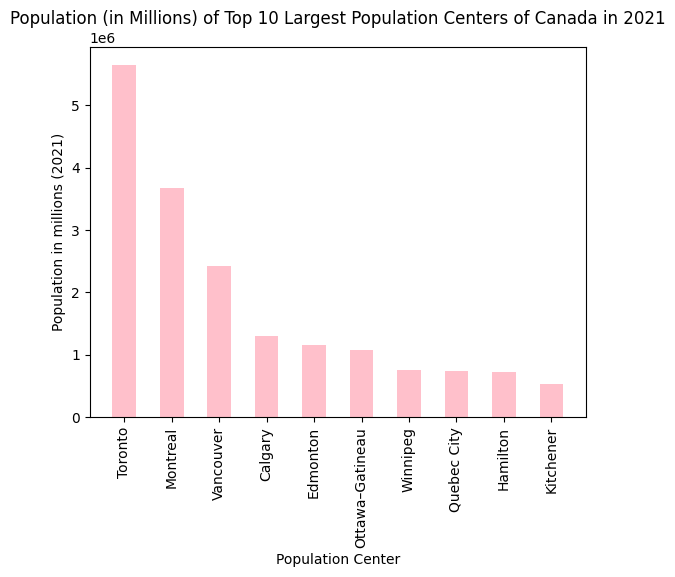

In [226]:
#Plot Population Density of Top 10 Largest Population Centers in Canada.

#Convert Population density column data in floating point numbers
final_data['Population (2021)'] = final_data['Population (2021)'].astype(float)

center_column = final_data["Population center"]
population_column = final_data["Population (2021)"]

selected_center = center_column[0:10]
selected_population = population_column[0:10]

# Now plot our bar graph
plt.bar(selected_center, selected_population, color = 'pink', width = 0.5)

plt.xlabel("Population Center")
plt.ylabel("Population in millions (2021)")


# We can add a title too
plt.title("Population (in Millions) of Top 10 Largest Population Centers of Canada in 2021")

plt.xticks(rotation=90)


### Plot a Box Plot for Population in 2021



Text(0, 0.5, 'Millions')

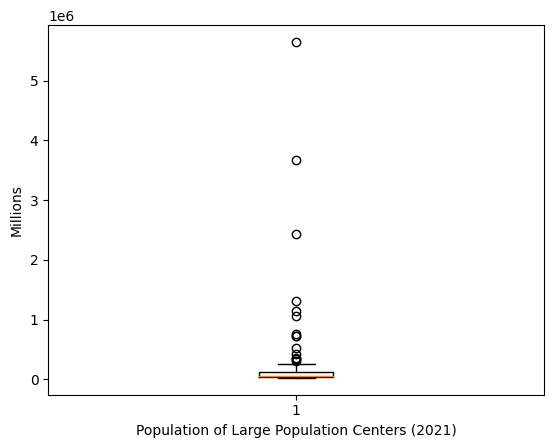

In [234]:
pop_2021_column = final_data["Population (2021)"]

plt.boxplot(pop_2021_column)

plt.xlabel("Population of Large Population Centers (2021)")
plt.ylabel("Millions")



### Basic Descriptive Statistics


In [227]:
final_data["Population (2021)"].describe()


count    1.000000e+02
mean     2.602907e+05
std      7.241524e+05
min      2.624600e+04
25%      3.856300e+04
50%      6.613100e+04
75%      1.291178e+05
max      5.647656e+06
Name: Population (2021), dtype: float64

In [228]:
final_data["Population (2016)"].describe()

count    1.000000e+02
mean     2.460554e+05
std      6.933066e+05
min      2.394400e+04
25%      3.634350e+04
50%      6.306100e+04
75%      1.198365e+05
max      5.433590e+06
Name: Population (2016), dtype: float64

**Analysis and Insights:** The data are indicative that the mean population in 2021 is greater than the mean population of large population centers in 2016 which means that overall, large population centers in Canada have experienced a growth in mean population. This can also be seen in the positive growth of all descriptive measures including the overall range in population and the standard deviation of the data as well.
